In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statistics import stdev
%matplotlib inline

In [2]:
from scipy.stats import t
from scipy.stats import norm

In [3]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [4]:
import warnings as wg
wg.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

# Dataset Description

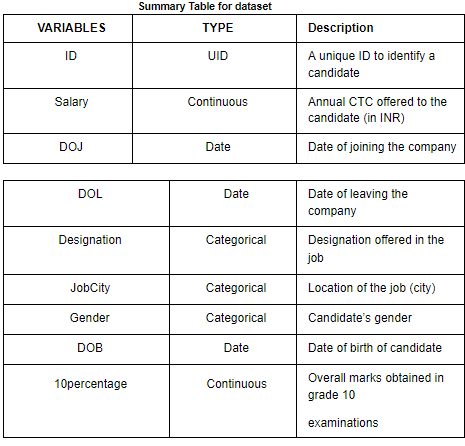

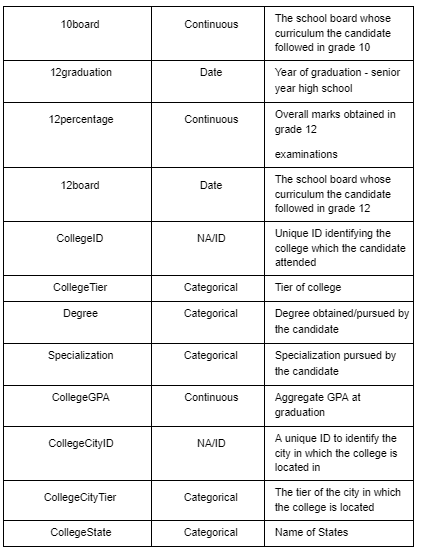

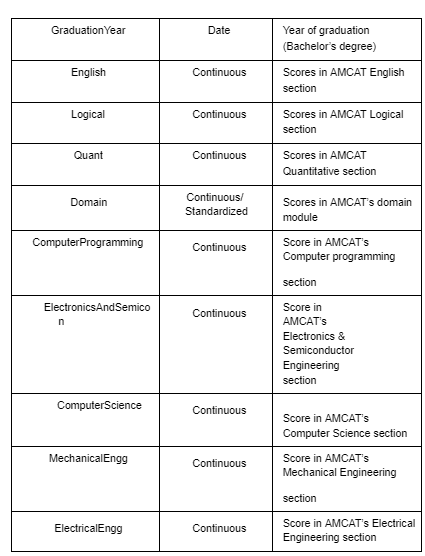

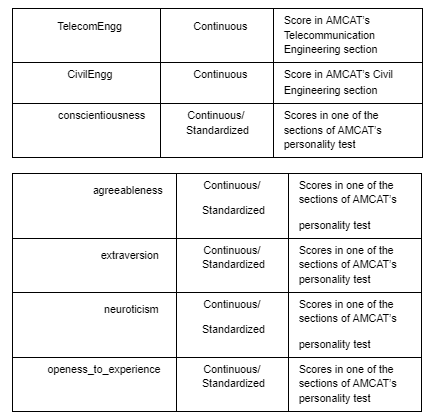

Importing the dataset

In [6]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [7]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
df.shape

(3998, 39)

In [9]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [11]:
df = df.drop(['Unnamed: 0'], axis = 'columns')

In [12]:
df['10board'] = df['10board'].replace('up', 'up board')
df['12board'] = df['12board'].replace('up', 'up board')

In [13]:
df['YOJ'] = df['DOJ'].dt.year

**Checking for missing values**

In [14]:
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

**Selecting only numberical columns**

In [15]:
num = list(df.select_dtypes(include = np.number).columns)

In [16]:
cat = list(df.select_dtypes(include = object).columns)

In [17]:
num.remove('ID')

In [18]:
# plt.figure(figsize = (15, 18))

# for  n in num:
#     sns.displot(df[n], kde = True)

# plt.tight_layout()
# plt.show()

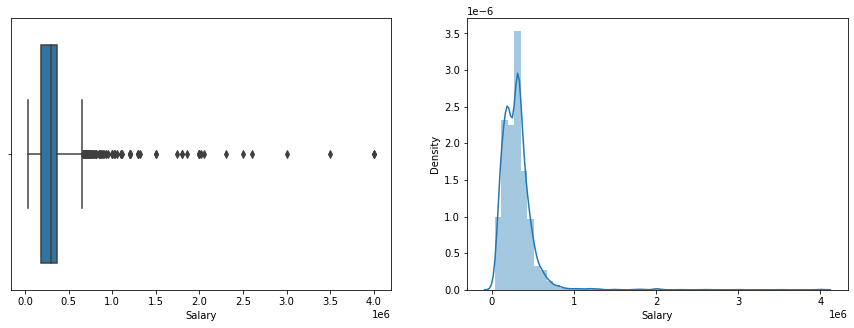

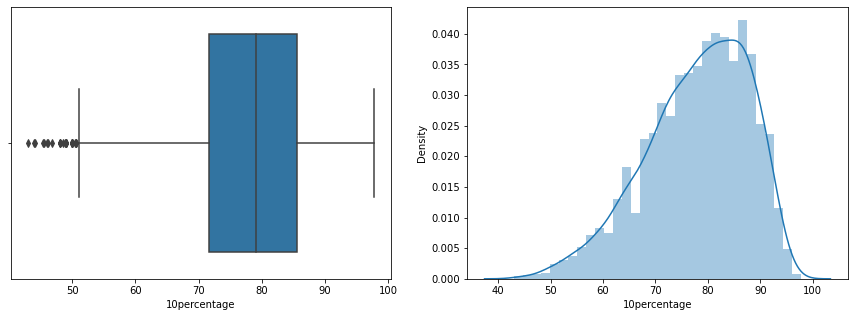

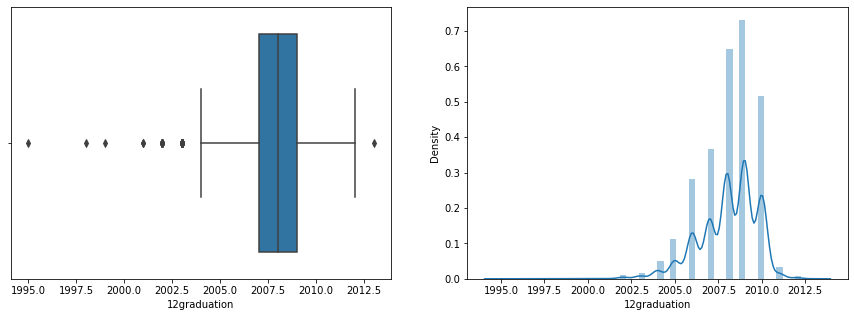

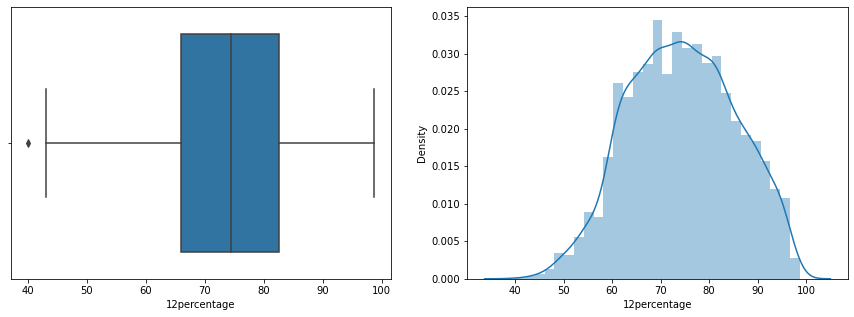

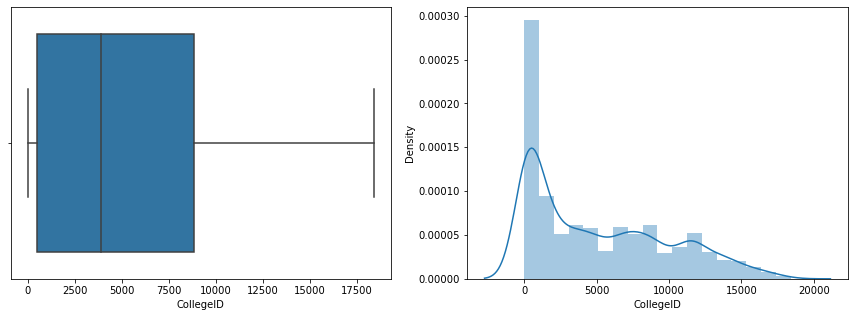

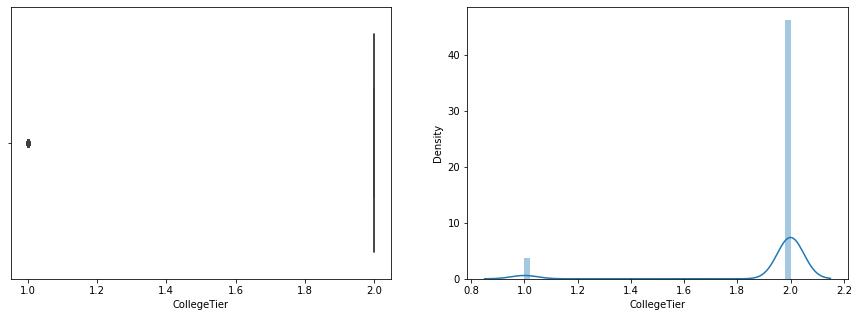

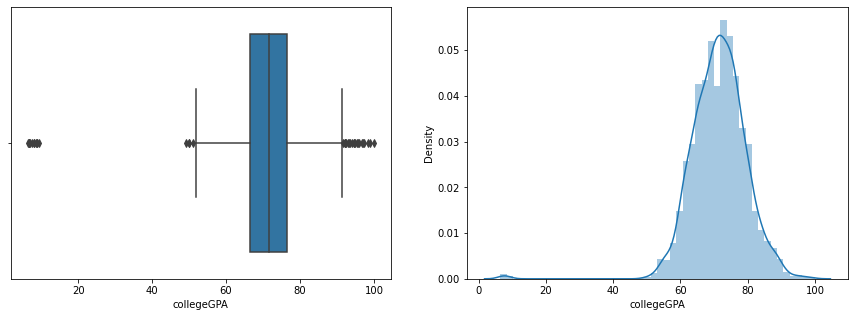

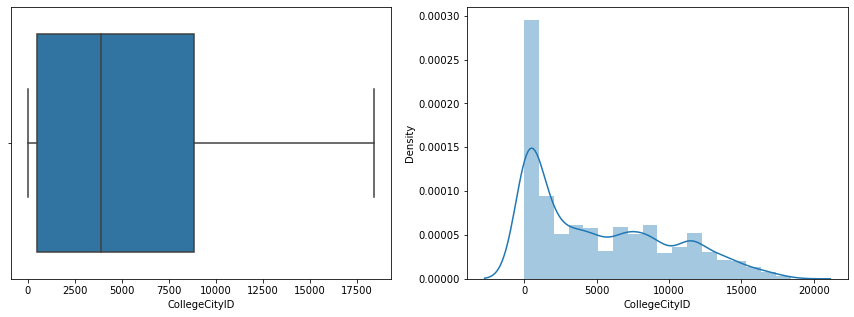

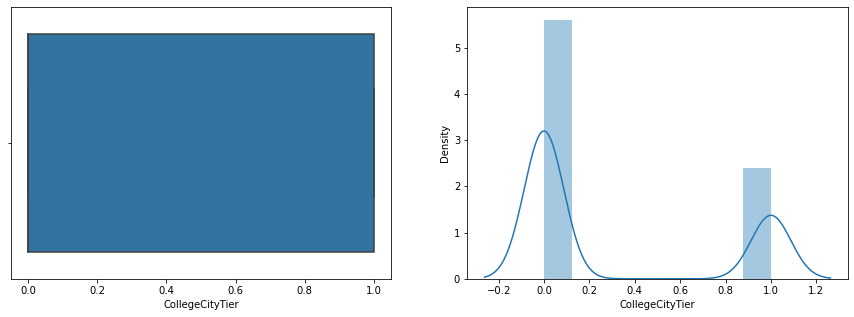

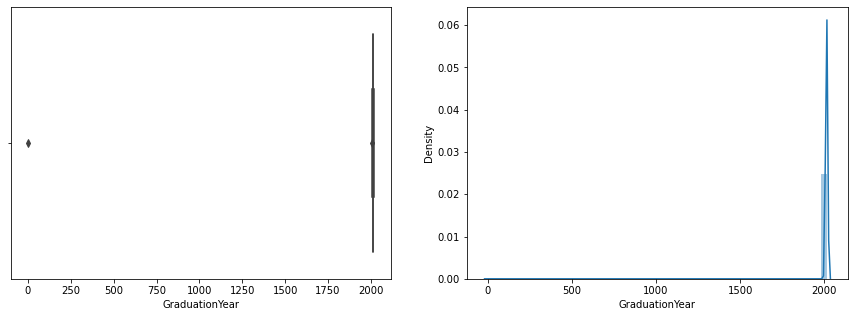

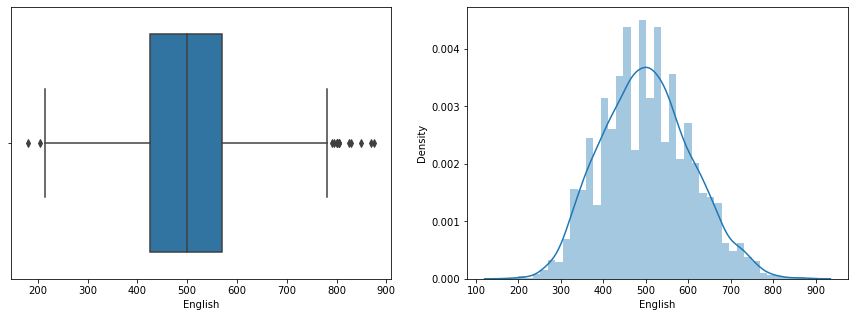

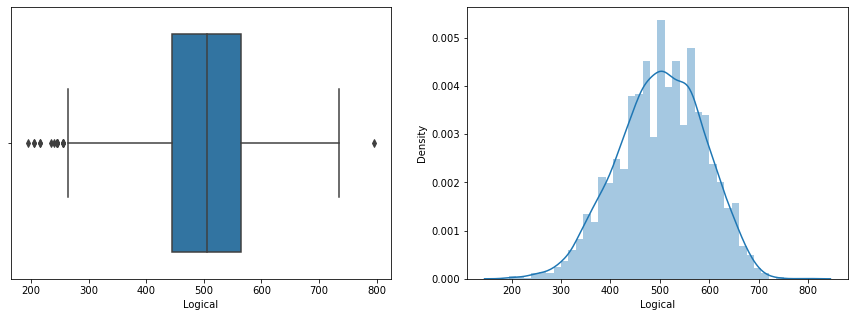

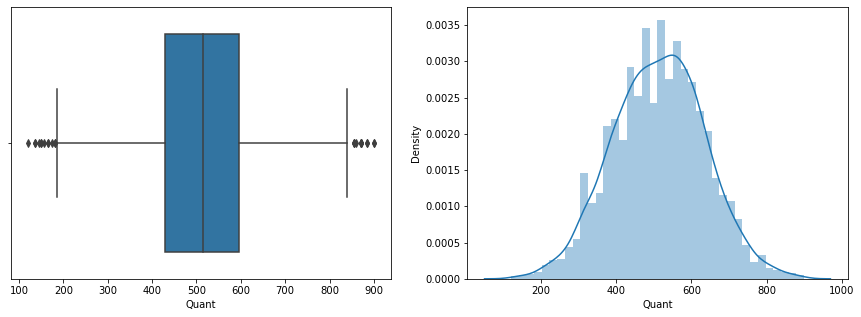

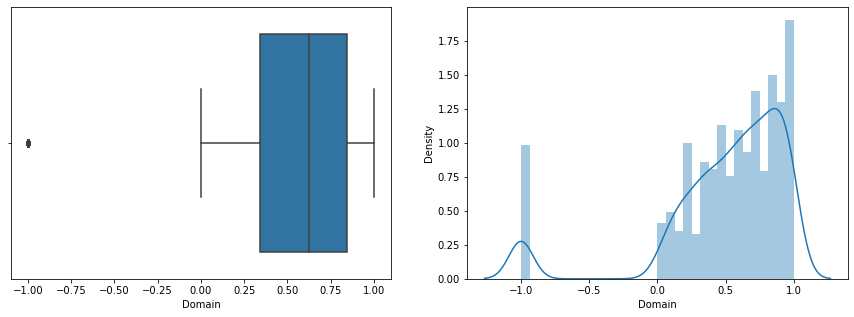

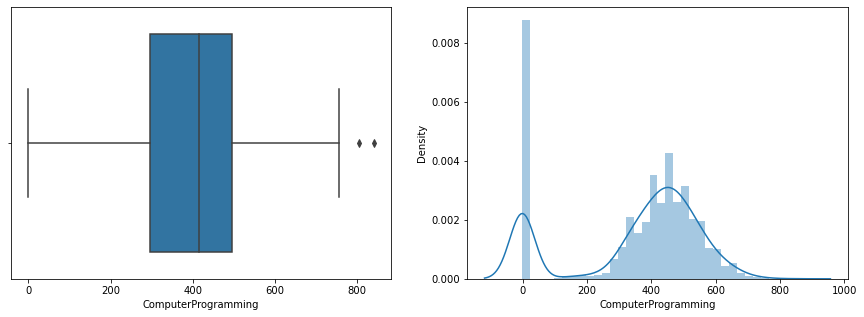

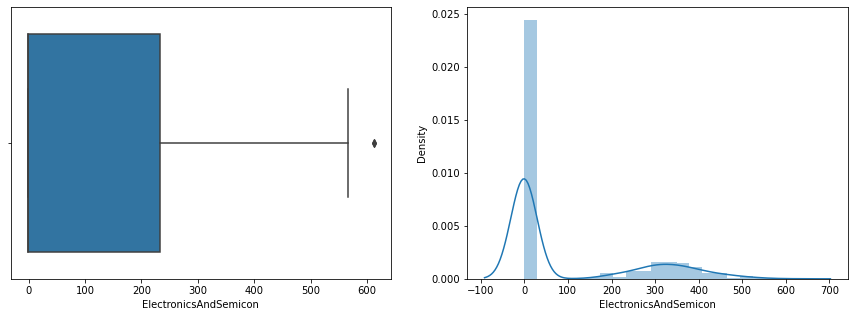

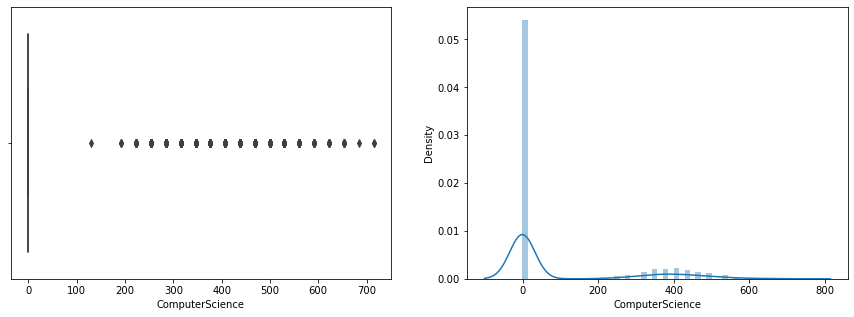

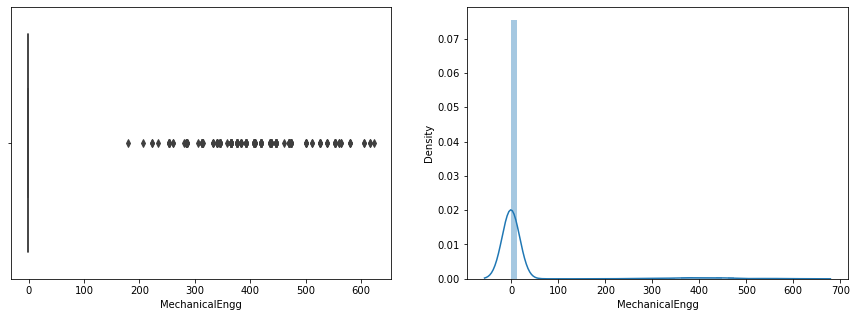

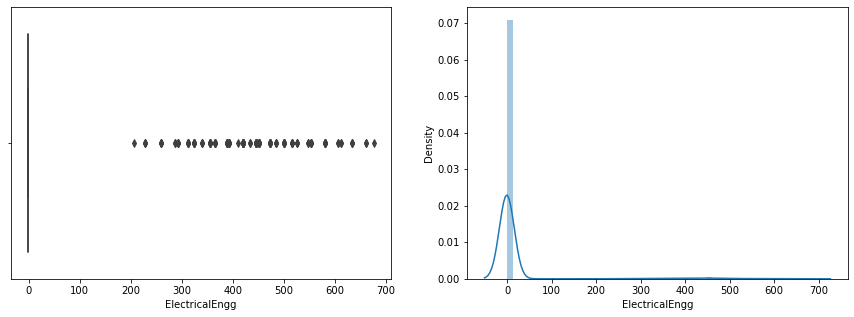

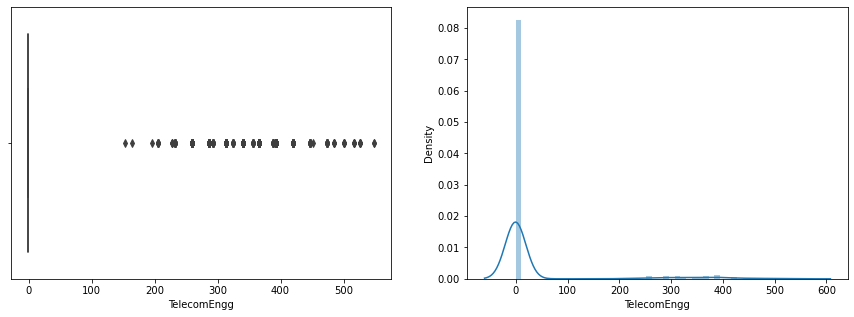

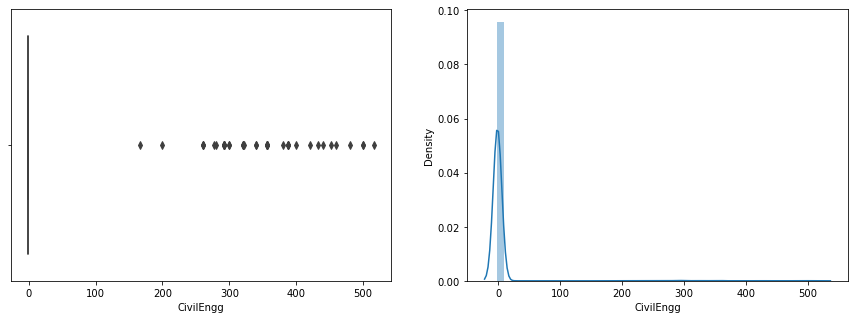

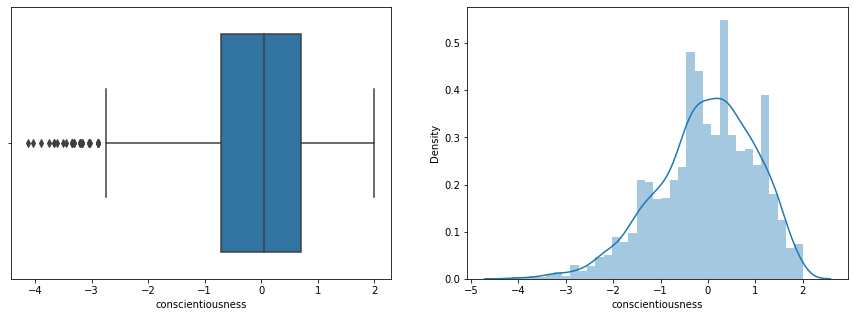

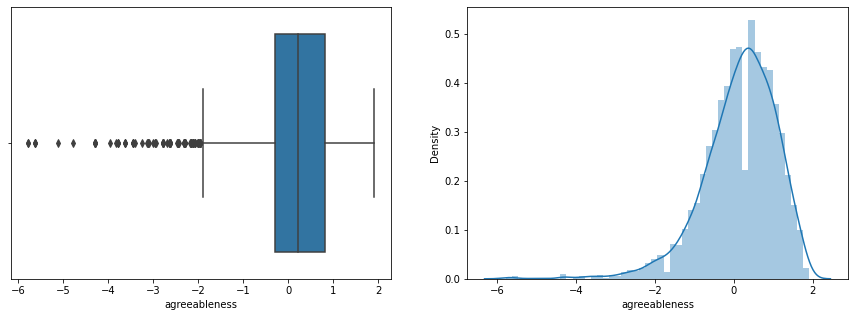

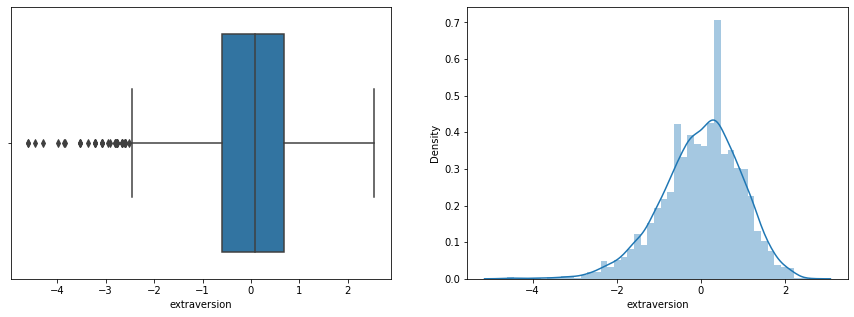

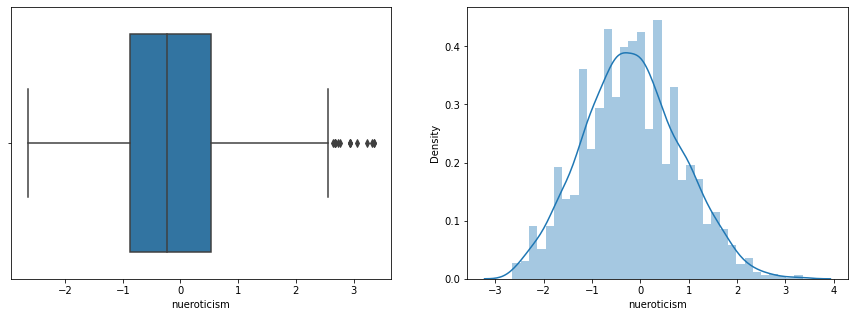

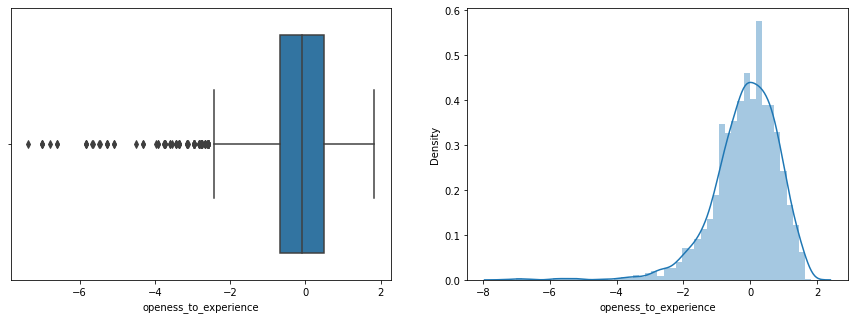

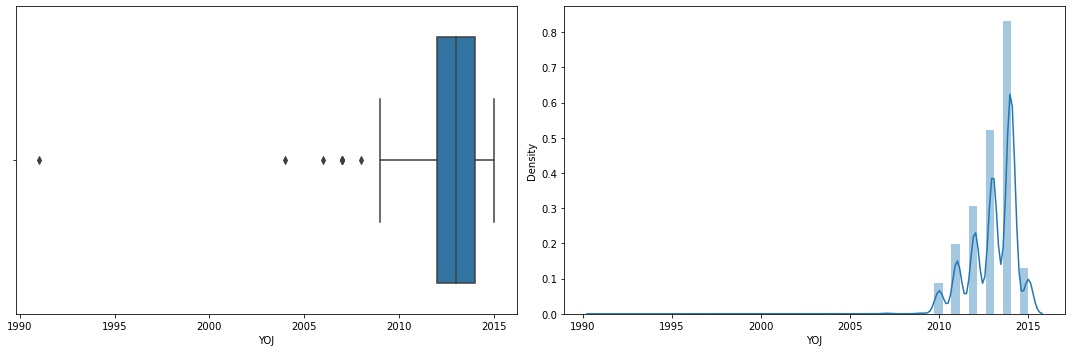

In [19]:
for i in num:
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.boxplot(x = i , data = df, ax = axes[0])
    
    sns.distplot(df[i],kde = True, ax = axes[1])
    
plt.tight_layout()  
plt.show()

Some Columns like  'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
    are showing different trends

In [20]:
df[[ 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']].nunique()

ElectronicsAndSemicon    29
ComputerScience          20
MechanicalEngg           42
ElectricalEngg           31
TelecomEngg              26
CivilEngg                23
dtype: int64

In [21]:
lst_1 =  ['ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

<Figure size 1440x1440 with 0 Axes>

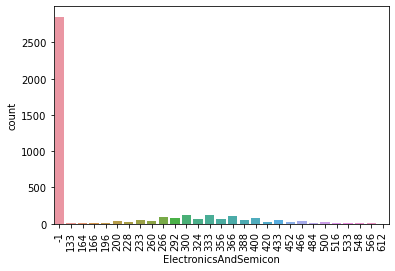

<Figure size 1440x1440 with 0 Axes>

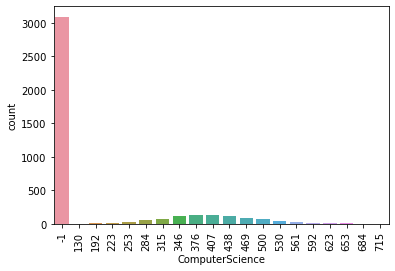

<Figure size 1440x1440 with 0 Axes>

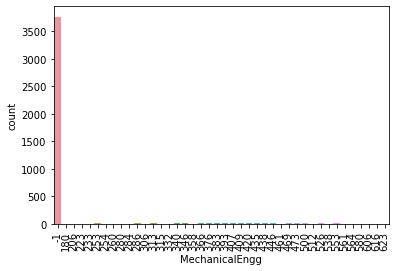

<Figure size 1440x1440 with 0 Axes>

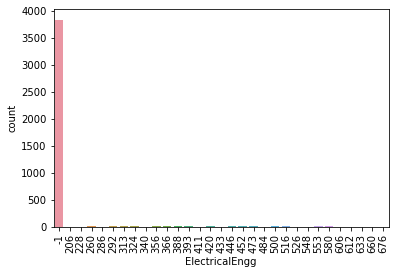

<Figure size 1440x1440 with 0 Axes>

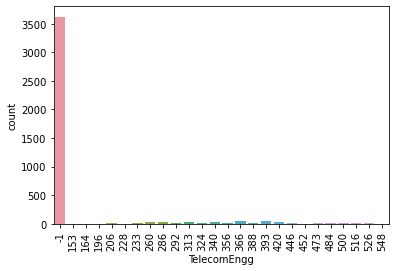

<Figure size 1440x1440 with 0 Axes>

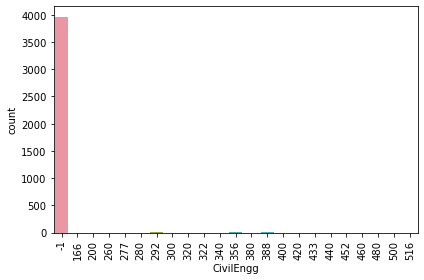

In [22]:
for i in lst_1:
    plt.figure(figsize = (20, 20))
    plt.subplots()
    sns.countplot(i, data = df)
    plt.xticks(rotation = 90) 
plt.tight_layout()
plt.show()

It shows that there were very few student who were from these engineering branch and filled these section

In [23]:
df[cat].nunique()

DOL                67
Designation       419
JobCity           339
Gender              2
10board           274
12board           339
Degree              4
Specialization     46
CollegeState       26
dtype: int64

In [24]:
cat.remove('DOL')

## Analyzing each categorical column separately

### Designation

**Top 10 highest number of designations which appeared in exam**

<AxesSubplot:>

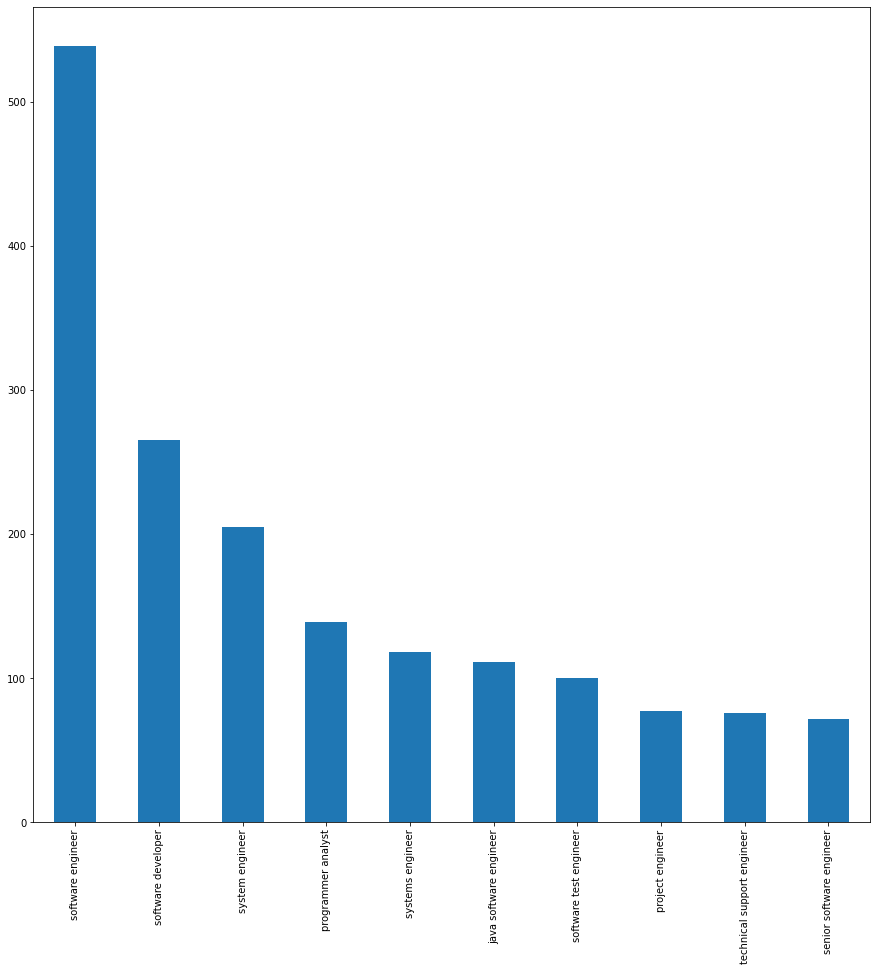

In [25]:
plt.figure(figsize = [15,15])
df['Designation'].value_counts().nlargest(10).plot(kind = 'bar')

It shows that people from computer related designations are of highes number

## JobCity

<AxesSubplot:>

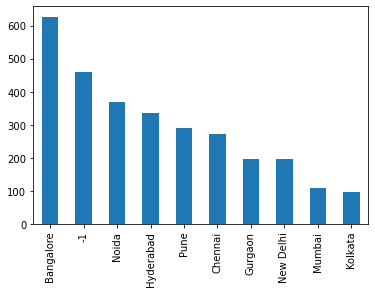

In [26]:
df['JobCity'].value_counts()[:10].plot(kind = 'bar')

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

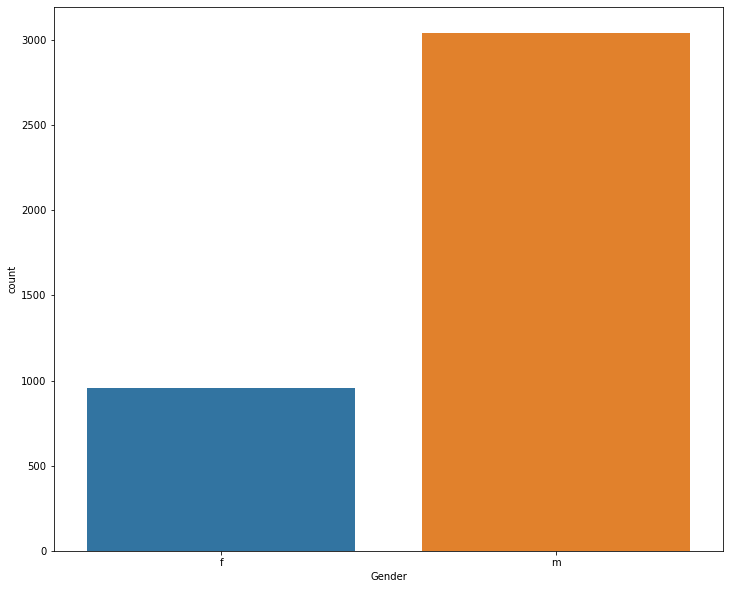

In [27]:
plt.figure(figsize = [12,10])
sns.countplot(df['Gender'])

### 10board

<AxesSubplot:>

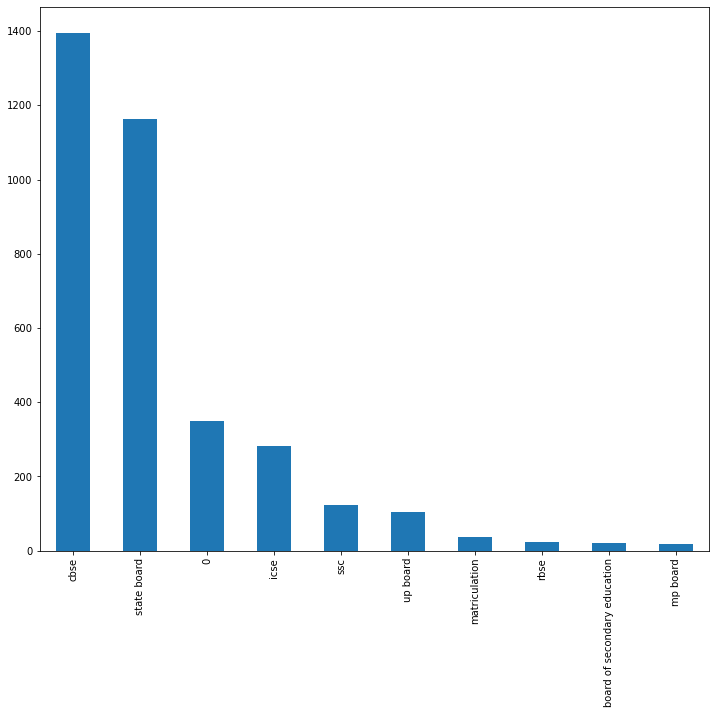

In [28]:
plt.figure(figsize = [12,10])
df['10board'].value_counts()[:10].plot(kind = 'bar')

As you can see most of the students appered in CBSE board in their 10th grade

### 12th Board

<AxesSubplot:>

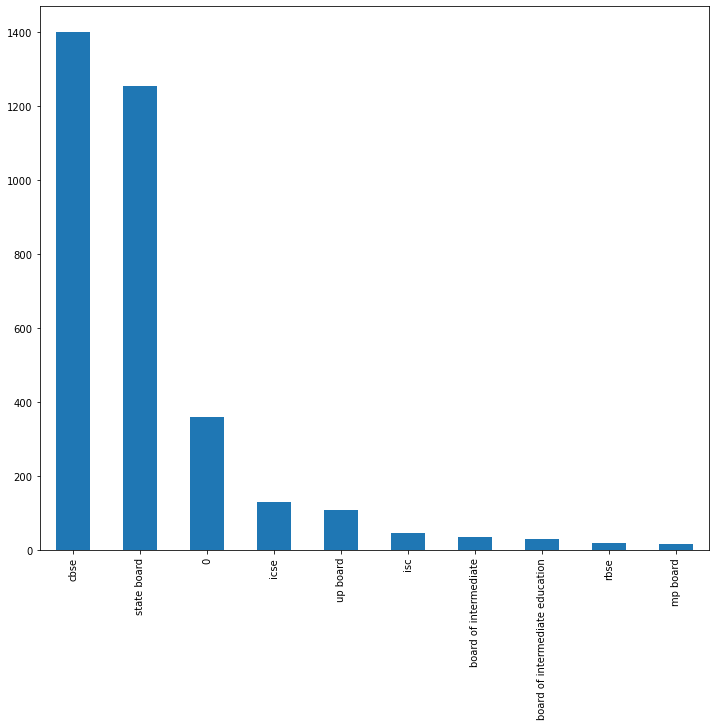

In [29]:
plt.figure(figsize = [12,10])
df['12board'].value_counts()[:10].plot(kind = 'bar')

It almost follows the same trend as 10th board

### Degree

<AxesSubplot:xlabel='Degree', ylabel='count'>

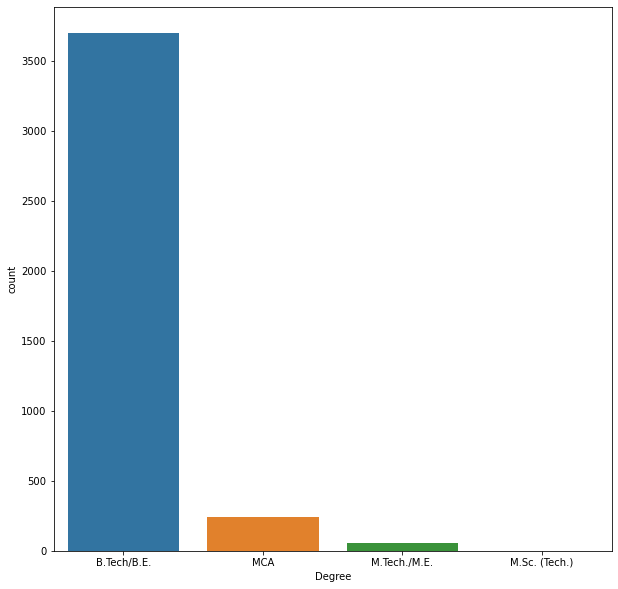

In [30]:
plt.figure(figsize = [10,10])
sns.countplot(df['Degree'])

Undergraduate engineers are always everywhere :)

### Specialization

<AxesSubplot:>

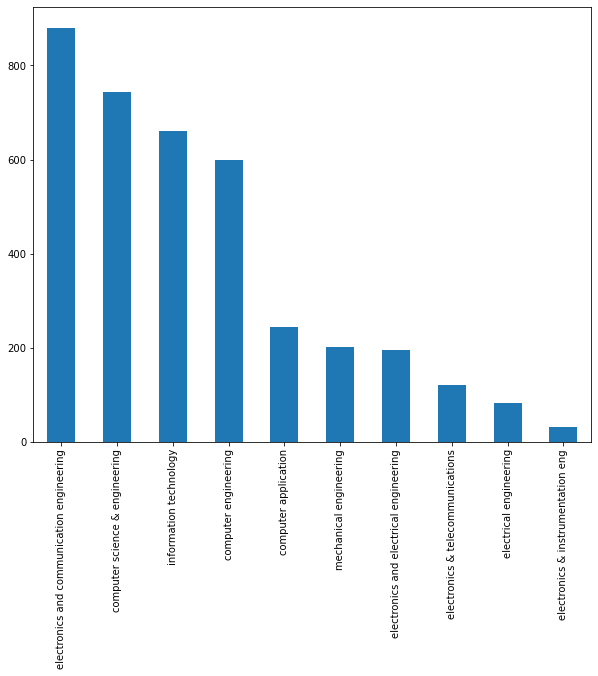

In [31]:
plt.figure(figsize = [10,8])
df['Specialization'].value_counts()[:10].plot(kind = 'bar')

Most number of students are from ECE and Computer branch

# Bivariate Analysis

In [32]:
num

['Salary',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeID',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityID',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'YOJ']

## Salary

<AxesSubplot:xlabel='Salary', ylabel='10percentage'>

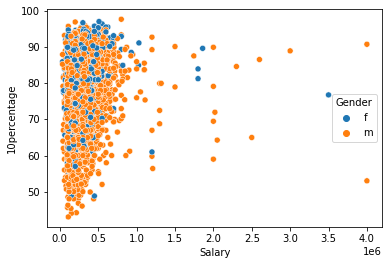

In [33]:
sns.scatterplot(x = 'Salary', y = '10percentage', hue = 'Gender', data = df)

It shows that someone having more 10th percentage doesn't mean he/she would be having more salary

<AxesSubplot:xlabel='Salary', ylabel='12percentage'>

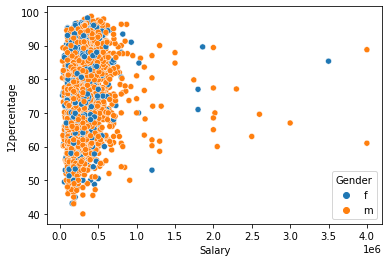

In [34]:
sns.scatterplot(x = 'Salary', y = '12percentage', hue = 'Gender', data = df)

It shows that someone having more 10th percentage doesn't mean he/she would be having more salary

<AxesSubplot:xlabel='Salary', ylabel='collegeGPA'>

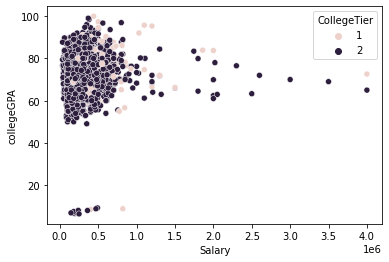

In [35]:
sns.scatterplot(x = 'Salary', y = 'collegeGPA', hue = 'CollegeTier', data = df)

Here also we can clearly see that more collegegpa doesn't mean higher salary

In [36]:
cat

['Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

In [37]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [38]:

import re

pat = re.compile('\w*(computer)\w*')

lst = [i for i in list(df['Specialization'].unique()) if pat.match(i)]

lst

['computer engineering',
 'computer science & engineering',
 'computer application',
 'computer science and technology',
 'computer and communication engineering',
 'computer networking',
 'computer science']

In [39]:
salarys=list(df[((df['Designation']=='programmer analyst')|
                 (df['Designation']=='software engineere')| 
                 (df['Designation']=='hardware engineer')|
                 (df['Designation']=='associate engineer')) 
               & (df['YOJ'] == df['GraduationYear'])]['Salary'])
# ((df['Specialization']=='computer science & engineering')|
#                  (df['Specialization']=='computer engineering'))

In [40]:
max(salarys), min(salarys)

(600000, 80000)

In [41]:
round(np.mean(salarys), 2), len(salarys)

(338958.33, 72)

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

Step 1: Compute Null and Alternate hupothesis     

$$H_0 \Rightarrow \mu\ \geq\ 300,000$$
$$H_1 \Rightarrow \mu\ <\ 300,000$$

In [42]:
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [43]:
sample_size = len(salarys)
sample_mean = np.mean(salarys)
pop_mean = 300000
pop_std = np.std(salarys)
#df = sample_size - 1

In [44]:
score_z = z_score(sample_size, sample_mean, pop_mean, pop_std)
score_z

5.027423664912285

In [45]:
alpha = 1 - 0.99

z_critical = norm.ppf(1 - alpha)

print(z_critical)

2.3263478740408408


In [46]:
confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha, df = sample_size -1 )
print(t_critical)

1.666599658219398


In [47]:
if(score_z < -z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


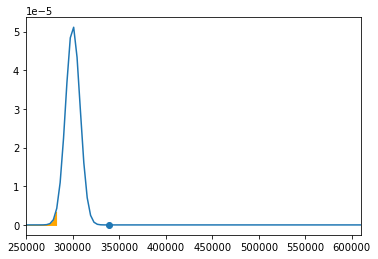

In [48]:
x_min = 250000
x_max = 610000
# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5
# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)
# Computing the left critical value (left tailed Test)
z_critical_left = pop_mean - (z_critical * std)
# Shading the left rejection region
x2 = np.linspace(x_min, z_critical_left, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')
# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)

It is not in the rejection region

**Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?**

Step 1: Computing the Null and Alternate Hypothesis:

$$H_0 \Rightarrow : They\ are\ independent$$
$$H_1 \Rightarrow : They\ are\ dependent$$

Step 2: 
 - Collect the sample of size n
 - Compute the sample frequencies

In [49]:
pd.crosstab(df.Specialization, df.Gender, margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [50]:
observed = pd.crosstab(df.Specialization, df.Gender)

observed

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


Step 3: Compute $\chi^{2}$ test statistic

Now check whether the differnce between observed and expected value is too large to reject the null hypothesis

 - Check observed frequencies through pd.crosstab on the sample
 - Find expected frequencies
$$Expected\ Value = \frac{row\ total * column\ total}{grand\ total}$$

Now, test statistic can be computed using below mentioned formula:
$$\chi^2 = \Sigma \frac{(o - e)^2}{e}$$

In [51]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

Step - 4: Decide $\alpha\ and\ df =\ (rows - 1)(cols - 1)$

In [52]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
dof = chi2_contingency(observed)[2]

In [53]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, dof)

chi2_critical

57.50530474499599

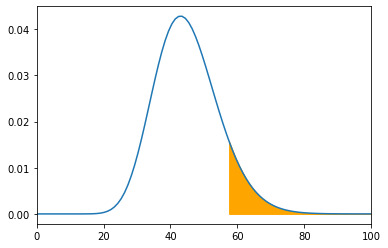

In [54]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, dof)
plt.fill_between(x1, y1, color='orange')

Step - 5: Apply decision rule:-

 - Chi Square Test
 $$if \chi^2 > \chi^2_{df, \alpha} \Rightarrow Reject H_0$$

In [55]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


**Hence it is concluded that Gender and Specialization are dependent on each other**

## Feature Transformation

In [59]:
df['Gender'] = df['Gender'].replace(['f','m'],[0,1])

In [63]:
cat.remove('Gender')

In [66]:
dummy = pd.get_dummies(df[cat], drop_first=True)

In [67]:
data = pd.concat([df, dummy], axis = 'columns')
data = data.drop(cat, axis = 'columns')

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
data.shape

(3998, 1472)

In [70]:
scaler = StandardScaler()

In [76]:
num.remove('YOJ')

In [83]:
for i in num:
    data[i] = scaler.fit_transform(data[[i]])

In [85]:
data[num].head()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0.527947,0.647233,-0.657765,1.939676,-0.836346,0.283282,0.797646,-0.836346,-0.655278,-0.034716,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966
1,0.904045,0.758921,-0.657765,0.957729,0.135401,0.283282,-0.174641,0.135401,-0.655278,-0.003322,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910
2,0.081332,0.718307,1.156686,-0.569744,-1.060644,0.283282,-0.181988,-1.060644,-0.655278,0.059466,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821
3,3.724775,0.779227,-0.657765,0.830439,0.367196,-3.530054,0.386200,0.367196,1.526071,-0.034716,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.506320,0.007570,-0.052948,0.212176,1.293542,0.283282,0.295584,1.293542,-0.655278,-0.003322,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542
